In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
books_data = pd.read_csv("../dataset/books_data.csv")

In [3]:
# keep only useful columns
books = books_data[["Title", "description", "categories"]]
# drop NaN
books = books.dropna(subset=["description"])
# eliminate useless descriptions
books = books[books["description"] != "No description available."]

In [4]:
ratings_data = pd.read_csv("../dataset/Books_rating.csv")

In [5]:
ratings_data.drop(
    [
        "Id",
        "Price",
        "profileName",
        "review/helpfulness",
        "review/summary",
        "review/text",
        "review/time",
    ],
    axis=1,
    inplace=True,
)

In [6]:
ratings = pd.merge(ratings_data, books, on="Title", how="inner")

In [7]:
ratings.dropna(subset=["User_id"], inplace=True)

In [8]:
ratings = ratings.rename(
    columns={"Title": "title", "User_id": "user", "review/score": "rating"}
)
ratings.head()

,title,user,rating,description,categories
0,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,Philip Nel takes a fascinating look into the k...,['Biography & Autobiography']
1,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Philip Nel takes a fascinating look into the k...,['Biography & Autobiography']
2,Dr. Seuss: American Icon,A2MVUWT453QH61,4.0,Philip Nel takes a fascinating look into the k...,['Biography & Autobiography']
3,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,Philip Nel takes a fascinating look into the k...,['Biography & Autobiography']
4,Dr. Seuss: American Icon,A2F6NONFUDB6UK,4.0,Philip Nel takes a fascinating look into the k...,['Biography & Autobiography']


In [9]:
len(ratings)

1912073

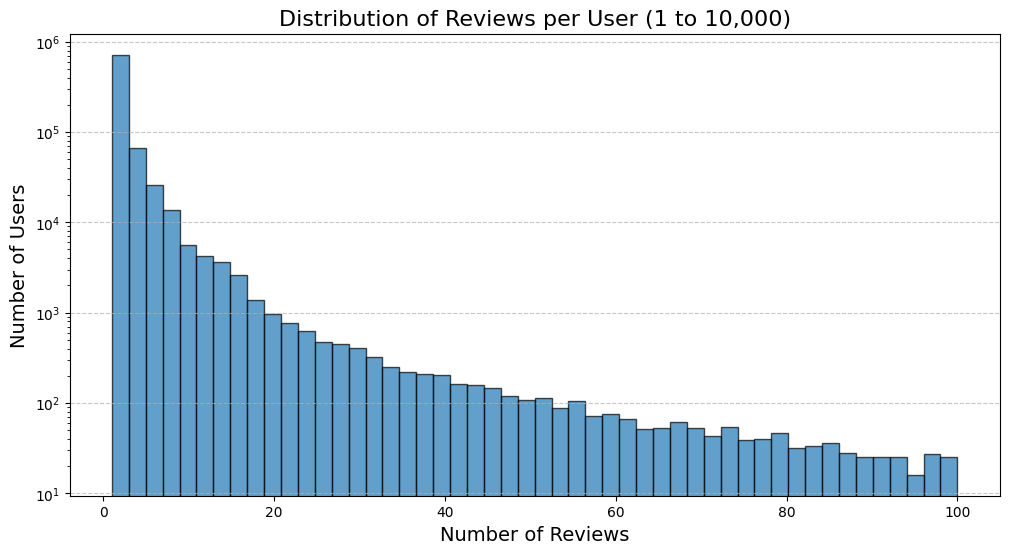

In [10]:
user_review_counts = ratings["user"].value_counts()
# Plotting the distribution of reviews per user
plt.figure(figsize=(12, 6))
plt.hist(
    user_review_counts[user_review_counts.between(1, 100)],
    bins=50,
    edgecolor="k",
    alpha=0.7,
)
plt.title("Distribution of Reviews per User (1 to 10,000)", fontsize=16)
plt.xlabel("Number of Reviews", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.yscale("log")  # Log scale for better visualization
plt.show()

In [11]:
# remove users with less than 9 ratings
valid_users = user_review_counts[user_review_counts >= 9].index
ratings = ratings[ratings["user"].isin(valid_users)]

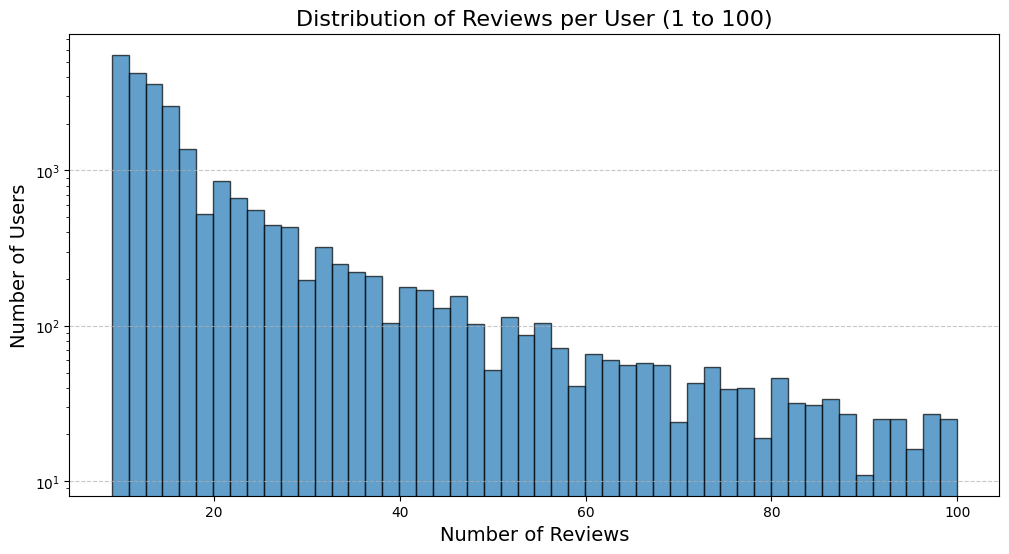

In [12]:
user_review_counts = ratings["user"].value_counts()
plt.figure(figsize=(12, 6))
plt.hist(
    user_review_counts[user_review_counts.between(1, 100)],
    bins=50,
    edgecolor="k",
    alpha=0.7,
)
plt.title("Distribution of Reviews per User (1 to 100)", fontsize=16)
plt.xlabel("Number of Reviews", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.yscale("log")  # Log scale for better visualization
plt.show()

In [13]:
len(ratings)

604906

In [14]:
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
ratings.loc[:, "user"] = user_encoder.fit_transform(ratings["user"])

books_encoder = LabelEncoder()
ratings.loc[:, "book_id"] = user_encoder.fit_transform(ratings["title"])

In [15]:
ratings.head()

,title,user,rating,description,categories,book_id
0,Dr. Seuss: American Icon,13243,5.0,Philip Nel takes a fascinating look into the k...,['Biography & Autobiography'],16961
2,Dr. Seuss: American Icon,10640,4.0,Philip Nel takes a fascinating look into the k...,['Biography & Autobiography'],16961
4,Dr. Seuss: American Icon,9274,4.0,Philip Nel takes a fascinating look into the k...,['Biography & Autobiography'],16961
5,Dr. Seuss: American Icon,879,5.0,Philip Nel takes a fascinating look into the k...,['Biography & Autobiography'],16961
10,Wonderful Worship in Smaller Churches,14374,5.0,This resource includes twelve principles in un...,['Religion'],75326


In [16]:
print(f'user: {ratings['user'].max()}, {ratings['user'].min()}')
print(f'user: {ratings['rating'].max()}, {ratings['rating'].min()}')
print(f'user: {ratings['book_id'].max()}, {ratings['book_id'].min()}')

user: 24876, 0
user: 5.0, 1.0
user: 76408, 0


In [17]:
# ratings in int8 -> smaller data
ratings["rating"] = ratings["rating"].astype("int8")
ratings["user"] = ratings["user"].astype("uint16")
ratings["book_id"] = ratings["book_id"].astype("int32")
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604906 entries, 0 to 2359702
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        604906 non-null  object
 1   user         604906 non-null  uint16
 2   rating       604906 non-null  int8  
 3   description  604906 non-null  object
 4   categories   558575 non-null  object
 5   book_id      604906 non-null  int32 
dtypes: int32(1), int8(1), object(3), uint16(1)
memory usage: 22.5+ MB


In [18]:
ratings.to_csv("../dataset/clean_dataset.csv", index=False)